In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import h_key
from api_keys import f_key
from api_keys import n_key


# Output File (CSV)
output_data_file = "output_data/hotel.csv"

# Range of latitudes and longitudes
#lat_range = (-90, 90)
#lng_range = (-180, 180)

### API Calls

In [2]:
# Create project dataframe (cities)
city_df = pd.read_csv("./Resources/Airport_Output.csv")
city_df.dropna(inplace = True) 
city_df.head()


,Unnamed: 0,City,State,Lat,Lng,Airport Name,Airport Address,Airport Rating,Airport Code
0,0,New York City,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2,EWR
1,1,Los Angeles,California,34.052234,-118.243685,Los Angeles International Airport,"1 World Way, Los Angeles",3.5,LAX
2,2,Chicago,Illinois,41.878114,-87.629798,O'Hare International Airport,"10000 W O'Hare Ave, Chicago",3.6,ORD
3,3,Houston,Texas,29.760427,-95.369803,William P. Hobby Airport,"7800 Airport Blvd, Houston",4.0,HOU
4,4,Philadelphia,Pennsylvania,39.952584,-75.165222,Philadelphia International Airport,"8000 Essington Ave, Philadelphia",3.3,PHL


In [3]:
merged_data_path = ("./merged_data.csv")
merged_data_df = pd.read_csv("./merged_data.csv")
merged_data_df.head()


,Unnamed: 0,City,State_x,Lat,Lng,Airport Name,Airport Address,Airport Rating,Airport Code,Cheapest_Outbound_Airfare,Cheapest_Return_Airfare,Hotel,Rating,State_y,Country,Price,location,name,rating,review_count
0,0.0,New York,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2,EWR,109.0,117.0,Artezen Hotel,4.0,NY,us,87.12,New York,Brooklyn Bridge,4.5,1398.0
1,0.0,New York,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2,EWR,109.0,117.0,World Center Hotel,4.0,NY,us,79.20,New York,Brooklyn Bridge,4.5,1398.0
2,0.0,New York,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2,EWR,109.0,117.0,Fairfield Inn & Suites by Marriott/World Trade...,3.0,NY,us,69.30,New York,Brooklyn Bridge,4.5,1398.0
3,0.0,New York,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2,EWR,109.0,117.0,Holiday Inn Express New York City- Wall Street,3.0,NY,us,74.25,New York,Brooklyn Bridge,4.5,1398.0
4,0.0,New York,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2,EWR,109.0,117.0,Aloft Manhattan Downtown - Financial District,3.0,NY,us,68.40,New York,Brooklyn Bridge,4.5,1398.0


In [4]:
merged_data_df.fillna(0, inplace=True)
merged_data_df

,Unnamed: 0,City,State_x,Lat,Lng,Airport Name,Airport Address,Airport Rating,Airport Code,Cheapest_Outbound_Airfare,Cheapest_Return_Airfare,Hotel,Rating,State_y,Country,Price,location,name,rating,review_count
0,0.0,New York,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2,EWR,109.0,117.0,Artezen Hotel,4.0,NY,us,87.12,New York,Brooklyn Bridge,4.5,1398.0
1,0.0,New York,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2,EWR,109.0,117.0,World Center Hotel,4.0,NY,us,79.20,New York,Brooklyn Bridge,4.5,1398.0
2,0.0,New York,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2,EWR,109.0,117.0,Fairfield Inn & Suites by Marriott/World Trade...,3.0,NY,us,69.30,New York,Brooklyn Bridge,4.5,1398.0
3,0.0,New York,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2,EWR,109.0,117.0,Holiday Inn Express New York City- Wall Street,3.0,NY,us,74.25,New York,Brooklyn Bridge,4.5,1398.0
4,0.0,New York,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2,EWR,109.0,117.0,Aloft Manhattan Downtown - Financial District,3.0,NY,us,68.40,New York,Brooklyn Bridge,4.5,1398.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.0,Ciudad Juarez,0,0.000000,0.000000,0,0,0.0,0,0.0,0.0,Hotel Flamingo Juarez,3.0,CHIH,mx,70.72,0,0,0.0,0.0
383,0.0,Ciudad Juarez,0,0.000000,0.000000,0,0,0.0,0,0.0,0.0,Hotel Santa Fe,3.0,CHIH,mx,37.48,0,0,0.0,0.0
384,0.0,Quincy,0,0.000000,0.000000,0,0,0.0,0,0.0,0.0,Brookside House,2.5,MA,us,75.00,0,0,0.0,0.0
385,0.0,Clarksville,0,0.000000,0.000000,0,0,0.0,0,0.0,0.0,Best Western Plus Louisville North,2.5,IN,us,65.44,0,0,0.0,0.0


In [5]:
mean = merged_data_df.groupby('location')['review_count'].mean()

bar_chart_df = pd.DataFrame({"Mean": mean})
                             
        
bar_chart_df

,Mean
location,
0,0.0
Albuquerque,155.0
Anaheim,50.0
Anchorage,179.0
Arlington,203.0
...,...
Tulsa,169.0
Virginia Beach,127.0
Washington,64.0


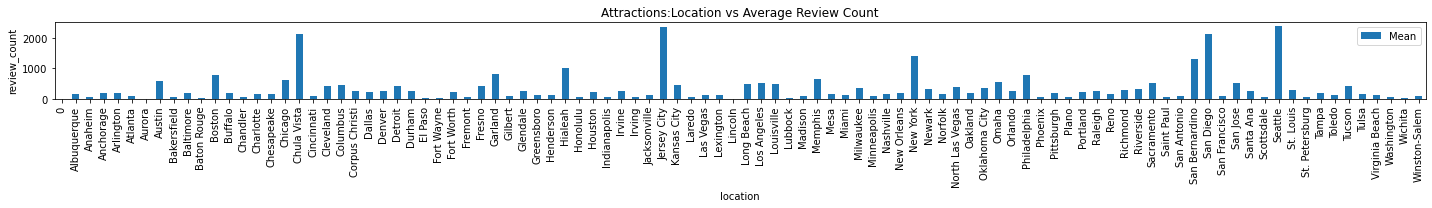

In [6]:
# Chart our data, give it a title, and label the axes
attraction_chart = bar_chart_df.plot(kind="bar",figsize=(20,3), title="Attractions:Location vs Average Review Count")
attraction_chart.set_xlabel("location")
attraction_chart.set_ylabel("review_count")


plt.tight_layout()
plt.savefig("Barchart_Attraction.png")
plt.show()

In [7]:
#sum_column = df["col1"] + df["col2"]
#df["col3"] = sum_column
#print(df)

In [8]:
#total_cost = merged_data_df.groupby('location')['review_count'].mean()

#bar_chart_df = pd.DataFrame({"Mean": mean})
                             
        
#bar_chart_df


total_cost_df= merged_data_df['Cheapest_Outbound_Airfare'] +merged_data_df['Cheapest_Return_Airfare']+ merged_data_df['Price']

#total = df['Cheapest_Outbound_Airfare'] + df['Cheapest_Return_Airfare']
total_cost_df

0      313.12
1      305.20
2      295.30
3      300.25
4      294.40
        ...  
382     70.72
383     37.48
384     75.00
385     65.44
386    109.00
Length: 387, dtype: float64

In [9]:
outbound = merged_data_df.groupby('City')['Cheapest_Outbound_Airfare'].mean()
inbound = merged_data_df.groupby('City')['Cheapest_Return_Airfare'].mean()
price = merged_data_df.groupby('City')['Price'].mean()

fare_df = pd.DataFrame({"outbound": outbound, "inbound": inbound, "price": price})
                             
        
fare_df

,outbound,inbound,price
City,,,
Albuquerque,268.0,0.0,88.84875
Anaheim,0.0,0.0,0.00000
Anchorage,0.0,0.0,0.00000
Arlington,68.0,93.0,0.00000
Atlanta,339.0,345.0,99.90500
...,...,...,...
Tulsa,0.0,0.0,0.00000
Virginia Beach,178.0,119.0,69.10250
Washington,0.0,0.0,106.20250


In [10]:
total_cost_df= fare_df['outbound'] + fare_df['inbound']+ fare_df['price']
total_cost_df.rename()
total_cost_df

City
Albuquerque       356.84875
Anaheim             0.00000
Anchorage           0.00000
Arlington         161.00000
Atlanta           783.90500
                    ...    
Tulsa               0.00000
Virginia Beach    366.10250
Washington        106.20250
Wichita             0.00000
Winston-Salem       0.00000
Length: 105, dtype: float64

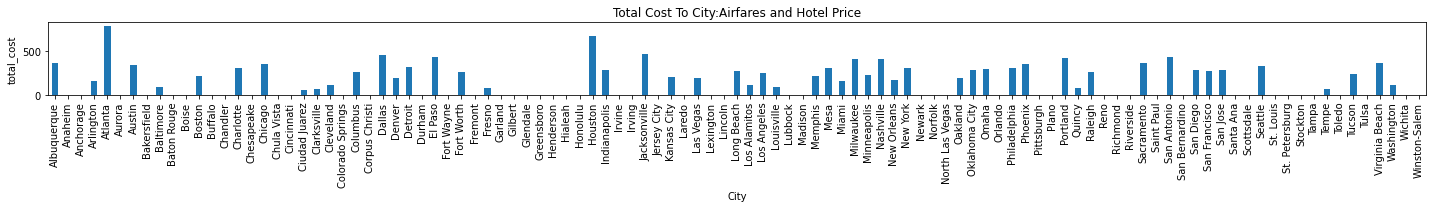

In [13]:
total_cost_chart = total_cost_df.plot(kind="bar",figsize=(20,3), title="Total Cost To City:Airfares and Hotel Price")
total_cost_chart.set_xlabel("City")
total_cost_chart.set_ylabel("total_cost")


plt.tight_layout()
plt.savefig("total_cost_Attraction.png")
plt.show()

In [14]:
outbound = merged_data_df.groupby('State_x')['Cheapest_Outbound_Airfare'].mean()
inbound = merged_data_df.groupby('State_x')['Cheapest_Return_Airfare'].mean()
price = merged_data_df.groupby('State_x')['Price'].mean()

fare2_df = pd.DataFrame({"outbound": outbound, "inbound": inbound, "price": price})
                             
        
fare2_df


,outbound,inbound,price
State_x,,,
0,0.000000,0.000000,69.088571
Alaska,0.000000,0.000000,0.000000
Arizona,107.692308,54.923077,87.750385
California,81.400000,59.215385,78.650462
Colorado,39.200000,39.200000,76.547000
District of Columbia,0.000000,0.000000,106.202500
Florida,121.769231,103.769231,75.032308
Georgia,339.000000,345.000000,99.905000
Hawai'i,0.000000,0.000000,0.000000


In [15]:
total_cost2_df= fare2_df['outbound'] + fare2_df['inbound']+ fare2_df['price']
total_cost2_df.rename()
total_cost2_df

State_x
0                        69.088571
Alaska                    0.000000
Arizona                 250.365769
California              219.265846
Colorado                154.947000
District of Columbia    106.202500
Florida                 300.570769
Georgia                 783.905000
Hawai'i                   0.000000
Idaho                     0.000000
Illinois                345.385000
Indiana                 246.720000
Kansas                    0.000000
Kentucky                 80.952500
Louisiana                85.000000
Maryland                 83.577500
Massachusetts           217.934286
Michigan                316.407500
Minnesota               114.500000
Missouri                180.236667
Nebraska                149.000000
Nevada                  137.816364
New Jersey                0.000000
New Mexico              356.848750
New York                272.362222
North Carolina          238.195789
Ohio                    198.907273
Oklahoma                254.693333
Oregon      

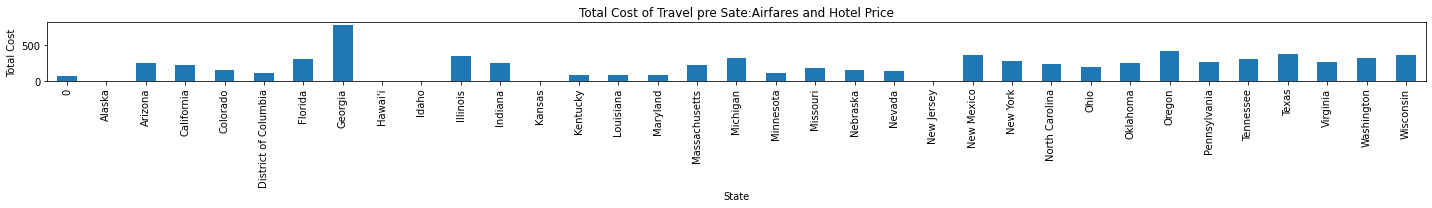

In [21]:
total_cost_chart2 = total_cost2_df.plot(kind="bar",figsize=(20,3), title="Total Cost of Travel pre Sate:Airfares and Hotel Price")
total_cost_chart2.set_xlabel("State")
total_cost_chart2.set_ylabel("Total Cost")


plt.tight_layout()
plt.savefig("total_cost_state.png")
plt.show()

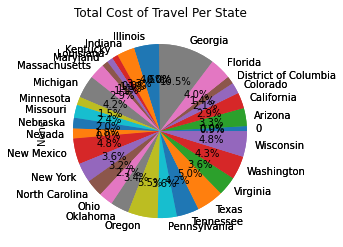

In [ ]:

airport_code=[]
cheapestTicketPrice=[]

#outbound trip call
#for index, row in city_df.iterrows():
    #code = row['Airport Code']
    #originplace='BWI'
    #destinationplace=code
    #departure_date="2021-03-15"
    #base_url = "https://skyscanner-skyscanner-flight-search-v1.p.rapidapi.com/apiservices/browsequotes/v1.0/US/USD/en-US/"
    #tags=originplace + "-sky/" + destinationplace + "-sky/" + departure_date
    #url=base_url + tags
    #print(url)
    #querystring = {"inboundpartialdate":"2021-03-19"}

    #headers = {
        #'x-rapidapi-key': "e5ee88badfmsh65ec7588e95e6fcp181b1cjsn38212393a000",
        #'x-rapidapi-host': "skyscanner-skyscanner-flight-search-v1.p.rapidapi.com"
        #}
    #try:
        #response = requests.request("GET", url, headers=headers, params=querystring)
        #response=response.json()
        #airport_code.append(code)
        #cheapestTicketPrice.append(response['Quotes'][0]['MinPrice'])
    #except:
        #cheapestTicketPrice.append('nan')


In [ ]:
#city_df['Cheapest_Outbound_Airfare']=cheapestTicketPrice

In [ ]:
#airport_code=[]
#cheapestTicketPrice=[]
#return trip
#for index, row in city_df.iterrows():
    #code = row['Airport Code']
    #destinationplace='IAD'
    #originplace=code
    #departure_date="2021-03-19"
    #base_url = "https://skyscanner-skyscanner-flight-search-v1.p.rapidapi.com/apiservices/browsequotes/v1.0/US/USD/en-US/"
    #tags=originplace + "-sky/" + destinationplace + "-sky/" + departure_date
    #url=base_url + tags
    #print(url)
    #querystring = {"inboundpartialdate":"2021-03-19"}

    #headers = {
        #'x-rapidapi-key': "e5ee88badfmsh65ec7588e95e6fcp181b1cjsn38212393a000",
        #'x-rapidapi-host': "skyscanner-skyscanner-flight-search-v1.p.rapidapi.com"
        #}
    #try:
        #response = requests.request("GET", url, headers=headers, params=querystring)
        #response=response.json()
        #airport_code.append(code)
        #cheapestTicketPrice.append(response['Quotes'][0]['MinPrice'])
    #except:
        #cheapestTicketPrice.append('nan')

In [ ]:
#city_df['Cheapest_Return_Airfare']=cheapestTicketPrice
#city_df



In [ ]:
#Kayla API LOOP
#counter = 0
#cities = []
#results=[]

    

#For loop
#for city,item in city_df.iterrows():
    #counter=counter+1  
    #print(item)
    #try:
        #url = "https://hotels-com-free.p.rapidapi.com/srle/listing/v1/brands/hotels.com"
        #print(item["Lat"],item["Lng"]) 
        #querystring = {"lat":item["Lat"],"lon":item["Lng"],"checkIn":"2021-03-15","checkOut":"2021-03-19","rooms":"2","locale":"en_US","currency":"USD","pageNumber":"1"}

        #headers = {
        #'x-rapidapi-key': h_key,
        #'x-rapidapi-host': "hotels-com-free.p.rapidapi.com"
        #}

        #response = requests.request("GET", url, headers=headers, params=querystring)

        #response = response.json()
    
#Reading the length of each ref
        #nh = len(response['data']['body']['searchResults']['results'])

       #for i in range(nh):

            #Hotel = response['data']['body']['searchResults']['results'][i]['name']
            #Rating = response['data']['body']['searchResults']['results'][i]['starRating']
            #City = response['data']['body']['searchResults']['results'][i]['address']['locality']
            #State = response['data']['body']['searchResults']['results'][i]['address']['region']
            #Country =response['data']['body']['searchResults']['results'][i]['address']['countryCode']
            #Stay_Rate = response['data']['body']['searchResults']['results'][i]['ratePlan']['price']['exactCurrent']
            
            #results.append([Hotel, Rating,City, State, Country,Stay_Rate])
            
            #time.sleep(2)
            
    #except:
        
        #print("Hotel Data Not Found")
   
               
#print(results)


In [ ]:
#hotel_df = pd.DataFrame(results,columns=["Hotel","Rating","City", "State", "Country","Price"])

#hotel_df.to_csv('HOTEL_API.csv', index=False)

#hotel_df

In [ ]:
#nichole api
#locations = city_df['City'].values.tolist()

In [ ]:
# TODO(uwana): Use your key here. Get it from yelp.com/developers
#api_key= n_key
#headers = {'Authorization': 'Bearer %s' % api_key}
# Using the business search API.
#url='https://api.yelp.com/v3/businesses/search'
#locations
# https://www.yelp.com/developers/documentation/v3/business_search
# All the attractions data
#attractions = []
# Making a get request to the API for each location
#for location in locations:
  # Use query paramaters that conform to the API: https://www.yelp.com/developers/documentation/v3/business_search
  #params = {'term': 'attractions', 'location': location, 'limit': 1, 'sort_by': 'rating'}
  #req = requests.get(url, params=params, headers=headers)
  #data = json.loads(req.text)
  #businesses = data['businesses']
  #for business in businesses:
    #business_info = {'location': location, 'name': business['name'], 'rating': business['rating'],
                    #'review_count': business['review_count']}
    #attractions.append(business_info)
#attractions_json = json.dumps(attractions)
#print(attractions_json)

In [ ]:
#yelp_df = pd.DataFrame(attractions)
#yelp_df.head(100)